# Análise Exploratória com uso de Percentis

## Importando Bibliotecas

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt

## Importando os Dados

In [2]:
# Dados de Peso e Tipo
df = pd.read_csv('peso_tipo.txt')
df.head().round()

,TIPO,PESO
0,2,360000.0
1,1,100000.0
2,2,362291.0
3,2,1230550.0
4,2,3149026.0


## Criando 3 Séries de Dados a partir da Coluna TIPO

A ideia aqui é separar o conjunto de dados em quantas forem as categorias da variável que se deseja analisar. Neste caso, a variável tipo apresenta apenas 3 categorias, portanto, vamos criar 3 séries de dados. 

Após criadas as séries de dados, vamos obter os valores dos percentis de 0 a 100, de 5 em 5. Em seguida, vamos juntas esses valores das 3 séries de dados em um dataframe para realizar a construção do gráfico de percentis.

In [3]:
# Repartindo o dataframe em porcões de acordo com o porte de empresa
df_tipo1 = df[df['TIPO']==1]
df_tipo2 = df[df['TIPO']==2]
df_tipo3 = df[df['TIPO']==3]

# Cria as séries de dados de tempo de atividade para cada porte
s1 = np.percentile(df_tipo1['PESO'], range(0,105,5)).round(2)
s2 = np.percentile(df_tipo2['PESO'], range(0,105,5)).round(2)
s3 = np.percentile(df_tipo3['PESO'], range(0,105,5)).round(2)

pcts_pesos = pd.DataFrame({'PESO1':s1, 'PESO2':s2, 'PESO3':s3})
pcts_pesos

,PESO1,PESO2,PESO3
0,60000.00,360000.01,4800000.06
1,60000.00,394671.58,5000000.00
2,60000.00,433447.00,5262198.94
3,67240.16,480000.00,5574264.66
4,75412.01,517948.23,5920269.43
5,81000.00,564739.00,6294017.99
6,92640.00,615692.72,6731565.36
7,103748.09,681000.00,7202994.55
8,116821.03,755085.60,7739483.85
9,123300.00,846503.16,8333963.48


## Descritivo das Variáveis Criadas a partir dos Percentis das Séries de Dados

Neste ponto, as estatísticas mais interessantes para se saber se a variável categórica em questão tem poder na definição dos valores da variável quantitativa, são:

- Mínimo
- Q1 (25%)
- Q2 (50%)
- Q3 (75%)
- Máximo

Pois a partir delas, teremos indícios de como será o gráfico das séries, ou seja, saberemos se as curvas se cruzam ou não e isso é um fator muito importante da determinação do poder de atuação da variável categórica na variável quantitativa.

In [4]:
# Descritivo das variáveis
pcts_pesos.describe().round()

,PESO1,PESO2,PESO3
count,21.0,21.0,21.0
mean,164536.0,1369182.0,11556024.0
std,95726.0,1161087.0,7079622.0
min,60000.0,360000.0,4800000.0
25%,81000.0,564739.0,6294018.0
50%,138294.0,959279.0,9035076.0
75%,231445.0,1701804.0,14431368.0
max,360000.0,4800000.0,30000000.0


## Construção do Gráfico dos Valores dos Percentis pelos Valores da Variável Quantitativa

Perceba por meio do gráfico abaixo que as curvas não se cruzam em nenhum momento e que no final da série de valores dos percentis, há uma diferença significativa entre as curvas. Isso indica que cada curva está em um patamar diferente e que a variável categórica (TIPO) separa bem esses patamares de valores da variável quantitativa (PESO).

Portanto, num problema de modelagem preditiva, por exemplo, a variável TIPO seria de grande utilidade, pois ajuda a qualificar a variável resposta, que neste caso seria o PESO.

Na hipótese de as curvas apresentarem cruzamentos ou convergirem para valores bem próximos, ao final do gráfico, teríamos a ideia de que a variável categórica pouco serviria para qualificar a variável quantitativa, ou seja, essa variável não ajudaria num processo de modelagem da variável quantitativa.

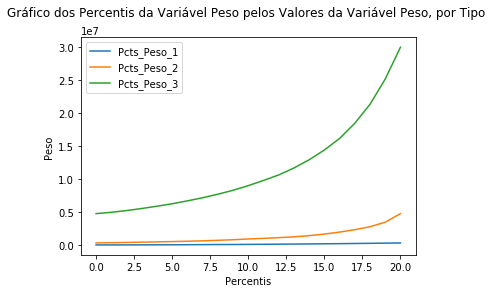

In [5]:
# Gráficos das séries dos percentis da variável Peso, de acordo com a variável Tipo
plt.title('Gráfico dos Percentis da Variável Peso pelos Valores da Variável Peso, por Tipo \n')
plt.xlabel('Percentis')
plt.ylabel('Peso')
plt.plot(pcts_pesos['PESO1'],label='Pcts_Peso_1')
plt.plot(pcts_pesos['PESO2'],label='Pcts_Peso_2')
plt.plot(pcts_pesos['PESO3'],label='Pcts_Peso_3')
plt.legend(loc='upper left')
plt.show();